# **BANK MARKETING CLASSIFICATION TASK**



Dataset con los datos de una entidad bancaria portuguesa sobre una campaña de marketing para que los clientes se suscriban a un depósito a plazo.

Se trata de predecir si un cliente se suscribirá o no a un depósito a plazo.

Vamos a analizar los datos con diversos modelos de clasificación: regresión logística, árboles de decisión, random forest, boosting...


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('bank_data.csv')
data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


## **Exploración de los datos**



In [2]:
data.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  day         4521 non-null   int64 
 11  month       4521 non-null   object
 12  duration    4521 non-null   int64 
 13  campaign    4521 non-null   int64 
 14  pdays       4521 non-null   int64 
 15  previous    4521 non-null   int64 
 16  poutcome    4521 non-null   object
 17  y           4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [4]:
data.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,2260.000000,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,1305.244613,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1130.000000,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3390.000000,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
data = data.drop(columns=['Unnamed: 0'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Eliminamos la variable duration, que representa la duración de la llamada, ya que puede dar problemas: si esta variable solo se registra una vez que la llamada se ha realizado como parte de la campaña de marketing, entonces esta variable no estaría disponible antes de realizar la campaña. En este caso, si estás tratando de predecir si un cliente se suscribirá a un depósito a plazo antes de realizar la campaña, la variable duration sería un predictor futuro y no estaría disponible en el momento de la predicción.


In [6]:
data = data.drop(columns=['duration'])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,4,211,3,other,no


## **Creación de columnas**



Creamos una columna _target_ que tomará el valor $1$ si _y = yes_ y el valor $0$ si _y = no:_


In [7]:
data['target'] = np.select(
     [
       data.y=='yes',
        data.y=='no'
    ],
    [
        1,
        0
    ]
)

data[['y','target']].drop_duplicates()

,y,target
0,no,0
13,yes,1


Hacemos lo mismo con las variables default, housing y loan, que toman los valores $yes$ y $no$.



In [8]:
data['default_num'] = np.select(
     [
       data.default=='yes',
        data.default=='no'
    ],
    [
        1,
        0
    ]
)

data[['default','default_num']].drop_duplicates()

,default,default_num
0,no,0
48,yes,1


In [9]:
data['housing_num'] = np.select(
     [
       data.housing=='yes',
        data.housing=='no'
    ],
    [
        1,
        0
    ]
)

data[['housing','housing_num']].drop_duplicates()

,housing,housing_num
0,no,0
1,yes,1


In [10]:
data['loan_num'] = np.select(
     [
       data.loan=='yes',
        data.loan=='no'
    ],
    [
        1,
        0
    ]
)

data[['loan','loan_num']].drop_duplicates()

,loan,loan_num
0,no,0
1,yes,1


Las variables education y month son variables categóricas que tienen orden, por lo que mapeamos las categorías a su orden.

In [11]:
data['education_num'] = data.education.replace({
    'primary': 1
    , 'secondary': 2
    , 'tertiary': 3
    , 'unknown': 0
})

data[['education','education_num']].drop_duplicates()

,education,education_num
0,primary,1
1,secondary,2
2,tertiary,3
20,unknown,0


In [12]:
data['month_num'] = data.month.replace({
    'jan': 1
    , 'feb': 2
    , 'mar': 3
    , 'apr': 4
    , 'may': 5
    , 'jun': 6
    , 'jul': 7
    , 'aug': 8
    , 'sep': 9
    , 'oct': 10
    , 'nov': 11
    , 'dec': 12
})

data[['month','month_num']].drop_duplicates()

,month,month_num
0,oct,10
1,may,5
2,apr,4
3,jun,6
5,feb,2
12,aug,8
14,jan,1
19,jul,7
20,nov,11
126,sep,9


Creamos variables dummies para transformar las variables categóricas que no tienen orden: job, marital, contact, poutcome.

Usamos prefijos para job, contact y poutcome para que no se confundan los unknown en los dummies.


In [13]:
data = pd.concat([
        data,
        pd.get_dummies(data.job, prefix = 'job', drop_first=False).astype(int)
    ],
    axis = 1
)

data[['job','job_unemployed','job_services','job_management','job_blue-collar','job_self-employed','job_technician','job_entrepreneur','job_admin.','job_student','job_housemaid','job_retired','job_unknown']].drop_duplicates()

,job,job_unemployed,job_services,job_management,job_blue-collar,job_self-employed,job_technician,job_entrepreneur,job_admin.,job_student,job_housemaid,job_retired,job_unknown
0,unemployed,1,0,0,0,0,0,0,0,0,0,0,0
1,services,0,1,0,0,0,0,0,0,0,0,0,0
2,management,0,0,1,0,0,0,0,0,0,0,0,0
4,blue-collar,0,0,0,1,0,0,0,0,0,0,0,0
6,self-employed,0,0,0,0,1,0,0,0,0,0,0,0
7,technician,0,0,0,0,0,1,0,0,0,0,0,0
8,entrepreneur,0,0,0,0,0,0,1,0,0,0,0,0
11,admin.,0,0,0,0,0,0,0,1,0,0,0,0
13,student,0,0,0,0,0,0,0,0,1,0,0,0
24,housemaid,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
data = pd.concat([
        data,
        pd.get_dummies(data.marital, drop_first=False).astype(int)
    ],
    axis = 1
)

data[['marital','married','single','divorced']].drop_duplicates()

,marital,married,single,divorced
0,married,1,0,0
2,single,0,1,0
20,divorced,0,0,1


In [15]:
data = pd.concat([
        data,
        pd.get_dummies(data.contact, prefix = 'contact', drop_first=False).astype(int)
    ],
    axis = 1
)

data[['contact','contact_cellular','contact_unknown','contact_telephone']].drop_duplicates()

,contact,contact_cellular,contact_unknown,contact_telephone
0,cellular,1,0,0
3,unknown,0,1,0
27,telephone,0,0,1


In [16]:
data = pd.concat([
        data,
        pd.get_dummies(data.poutcome, prefix = 'poutcome', drop_first=False).astype(int)
    ],
    axis = 1
)
data[['poutcome','poutcome_unknown','poutcome_failure','poutcome_other','poutcome_success']].drop_duplicates()

,poutcome,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success
0,unknown,1,0,0,0
1,failure,0,1,0,0
6,other,0,0,1,0
49,success,0,0,0,1


## **División del dataset en Train\-Test**



Para evaluar los modelos, dividiremos el dataset en Train y Test, y así podremos usar las métricas de forma insesgada.

- Train: datos de entrenamiento (80%)

- Test: datos para obtener la métrica final insesgada del modelo (20%)

In [17]:
from sklearn.model_selection import train_test_split

features = [c for c in data.select_dtypes(include=np.number).columns if c not in ['target','y']]

pct_test = 0.20

features_train, features_test, target_train, target_test = train_test_split(data[features], data['target'], test_size=pct_test, random_state=42)

## **Modelo 1: Regresión logística**



In [408]:
from sklearn.linear_model import LogisticRegression

features_step = [c for c in data.select_dtypes(include=np.number).columns if c not in ['target','y','job','pdays','previous','balance','default','education']]

lr = LogisticRegression()
lr.fit(data[features_step], data.target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### **Predicciones**



In [409]:
data['y_hat_lr'] = lr.predict_proba(data[features_step])[:,1] # class 1 probability
data['y_hat_lr_rank'] = data.y_hat_lr.rank()

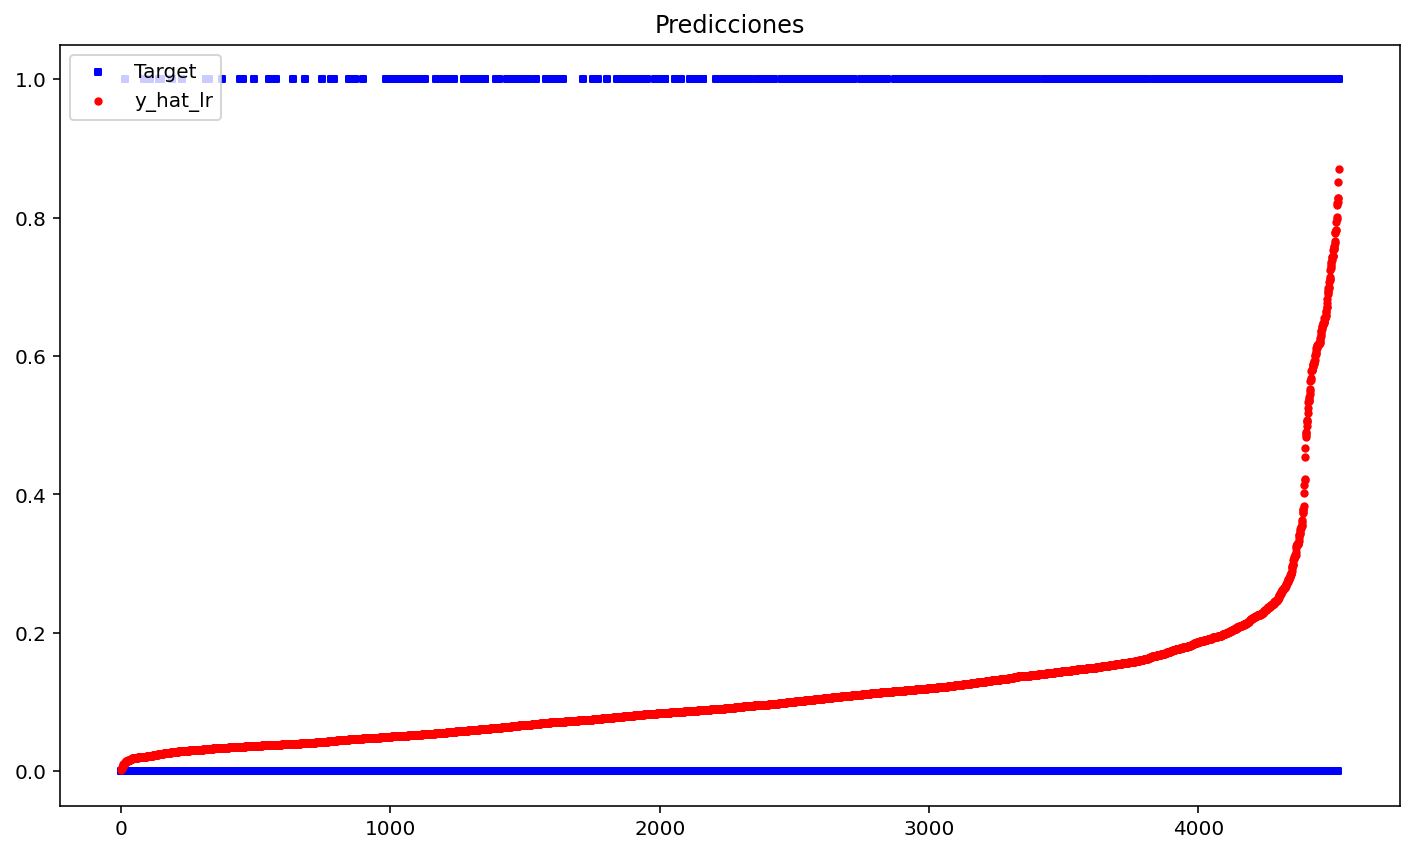

In [410]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(data.y_hat_lr_rank, data.target, s=10, c='b', marker="s", label='Target')
ax1.scatter(data.y_hat_lr_rank, data.y_hat_lr, s=10, c='r', marker="o", label='y_hat_lr')
plt.title("Predicciones")
plt.legend(loc='upper left')
plt.show()

#### **Coeficientes**



In [411]:
coef = pd.DataFrame({
    'feature' : features_step,
    'coef' : lr.coef_[0]
})
coef['rank'] = np.abs(coef.coef).rank(method='first',ascending=False)
coef.sort_values('rank',inplace=True)
coef

ValueError: All arrays must be of the same length

#### **Evaluación del modelo**



In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features_step], data[['target']], test_size=0.2, random_state=42)

In [412]:
lr.fit(data[features_step], data.target)
lr.fit(X_train, y_train)
yhat_lr_test = lr.predict(X_test)
yhat_lr_test_proba = lr.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

In [413]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, yhat_lr_test_proba>=0.19)

0.15435891122713602

In [414]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat_lr_test_proba>=0.19))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       807
           1       0.28      0.28      0.28        98

    accuracy                           0.84       905
   macro avg       0.59      0.59      0.59       905
weighted avg       0.84      0.84      0.84       905



In [415]:
from sklearn.metrics import accuracy_score

# Ratio de acierto (accuracy)
accuracy_score(y_test, yhat_lr_test_proba>=0.19, normalize=True)

0.8430939226519337

In [416]:
from sklearn.metrics import cohen_kappa_score

# Coeficiente kappa
cohen_kappa_score(y_test, yhat_lr_test_proba>=0.19)

0.1875300305996005

In [417]:
from sklearn.metrics import precision_score

# Precisión
precision_score(y_test, yhat_lr_test_proba>=0.19)

0.2755102040816326

In [418]:
from sklearn.metrics import recall_score

# Exhaustividad (recall)
recall_score(y_test, yhat_lr_test_proba>=0.19)

0.2755102040816326

In [419]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Horizontal: Target
# Vetical: Modelo
confusion_matrix(y_test, yhat_lr_test_proba >= 0.19)

array([[736,  71],
       [ 71,  27]])

In [420]:
tn, fp, fn, tp = confusion_matrix(y_test, yhat_lr_test_proba >= 0.19).ravel()

False_Positive_Rate = fp / (fp + tp)
False_Negative_Rate = fn / (fn + tn)

print(f"Ratio Falsos Positivos (Error Tipo I): {False_Positive_Rate}")
print(f"Ratio Falsos Negativos (Error Tipo II): {False_Negative_Rate}")

Ratio Falsos Positivos (Error Tipo I): 0.7244897959183674
Ratio Falsos Negativos (Error Tipo II): 0.08798017348203221


In [421]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, yhat_lr_test_proba)

model_thresholds = pd.DataFrame({
    'threshold': list(thresholds)+[1],
    'precision': precision,
    'recall': recall
}).sort_values('threshold', ascending=False)
model_thresholds

,threshold,precision,recall
905,1.000000,1.000000,0.000000
904,0.864971,1.000000,0.010204
903,0.821809,1.000000,0.020408
902,0.802349,1.000000,0.030612
901,0.744402,1.000000,0.040816
...,...,...,...
4,0.012314,0.107658,0.989796
3,0.010177,0.107539,0.989796
2,0.009091,0.107420,0.989796
1,0.007621,0.108407,1.000000


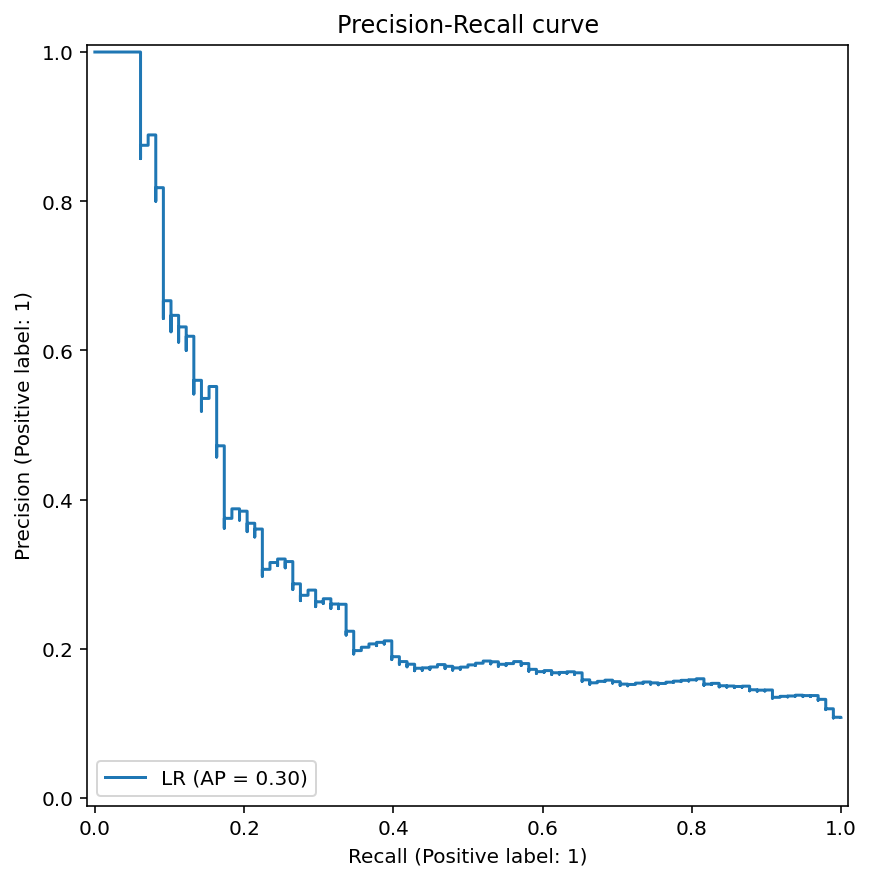

In [422]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(
    y_test,
    yhat_lr_test_proba,
    name="LR"
)
_ = display.ax_.set_title("Precision-Recall curve")

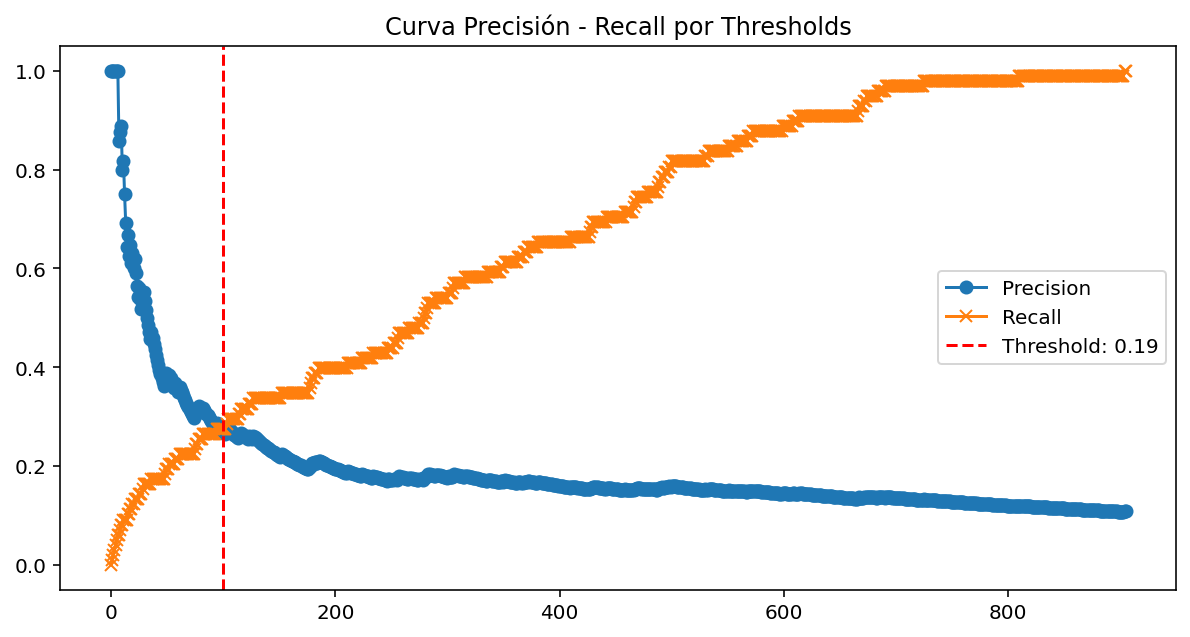

In [423]:
model_thresholds.sort_values('threshold', ascending=False, inplace=True)

i = 100
t0 = model_thresholds.threshold.to_list()[i]

x = range(len(model_thresholds))

plt.figure(figsize=(10, 5)) 
plt.plot(x, model_thresholds.precision, label='Precision', marker='o')  
plt.plot(x, model_thresholds.recall, label='Recall', marker='x')  
plt.axvline(x=i, color='r', label=f"Threshold: {t0:.2f}", linestyle='--')
plt.title("Curva Precisión - Recall por Thresholds")
plt.legend()

In [424]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, yhat_lr_test_proba)


pd.DataFrame({
    'threshold': thresholds,
    'tpr': tpr,
    'fpr': fpr
}).sort_values('threshold', ascending=False).head()

,threshold,tpr,fpr
0,inf,0.000000,0.000000
1,0.864971,0.010204,0.000000
2,0.724138,0.061224,0.000000
3,0.706075,0.061224,0.001239
4,0.683406,0.081633,0.001239


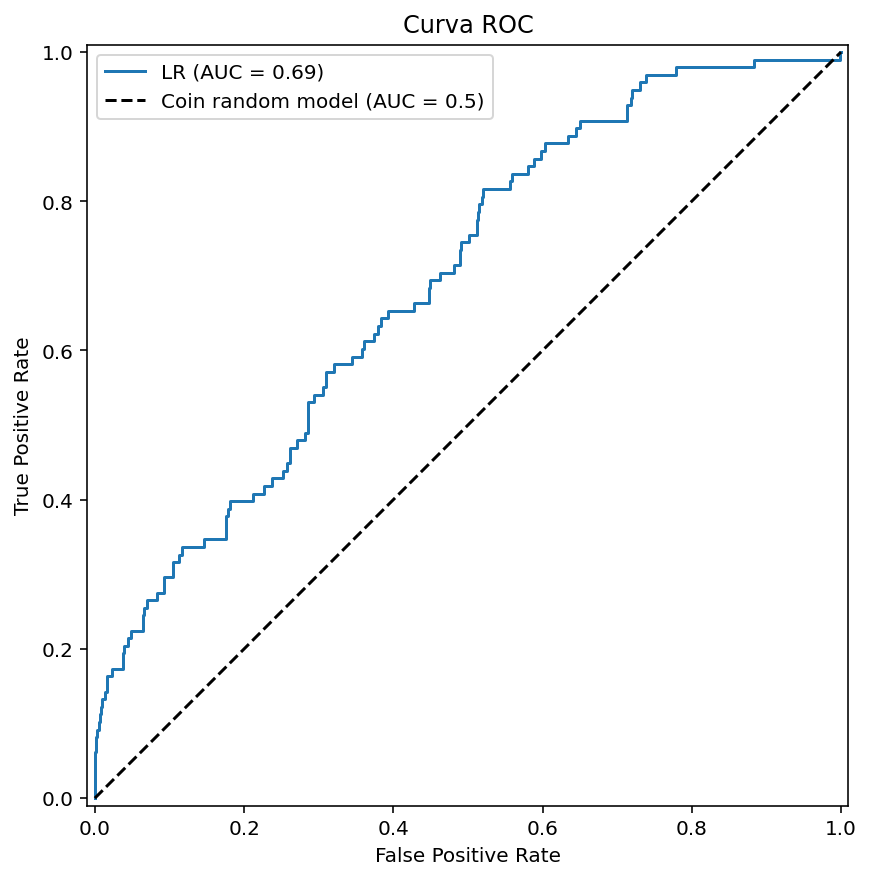

In [425]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Area Under the Curve
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(
    fpr=fpr, 
    tpr=tpr, 
    roc_auc=roc_auc,
    estimator_name='LR'
)
display.plot() 

plt.title("Curva ROC")
plt.plot([0, 1], [0, 1], "k--", label="Coin random model (AUC = 0.5)")
plt.legend()

In [426]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, yhat_lr_test_proba, average=None)

0.6934097058897909

In [427]:
yhat_lr_train = lr.predict(X_train)
yhat_lr_train_proba = lr.predict_proba(X_train)[:, 1]

# Ratio de acierto (accuracy)
accuracy_score(y_train, yhat_lr_train_proba>=0.19, normalize=True)

0.8498340707964602

In [428]:
# Precisión
precision_score(y_train, yhat_lr_train_proba>=0.19)

0.3598130841121495

In [429]:
# Exhaustividad (recall)
recall_score(y_train, yhat_lr_train_proba>=0.19)

0.3640661938534279

No parece que haya overfitting.


## **Modelo 2: Árbol de decisión**



In [430]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(
    criterion='gini',
    splitter = 'best',
    max_depth = 2,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_leaf_nodes = None,
    min_impurity_decrease = 0,
    max_features = None,
    ccp_alpha = 0
) 
tree.fit(data[features], data.target)

DecisionTreeClassifier(ccp_alpha=0, max_depth=2, min_impurity_decrease=0)

IndexError: list index out of range

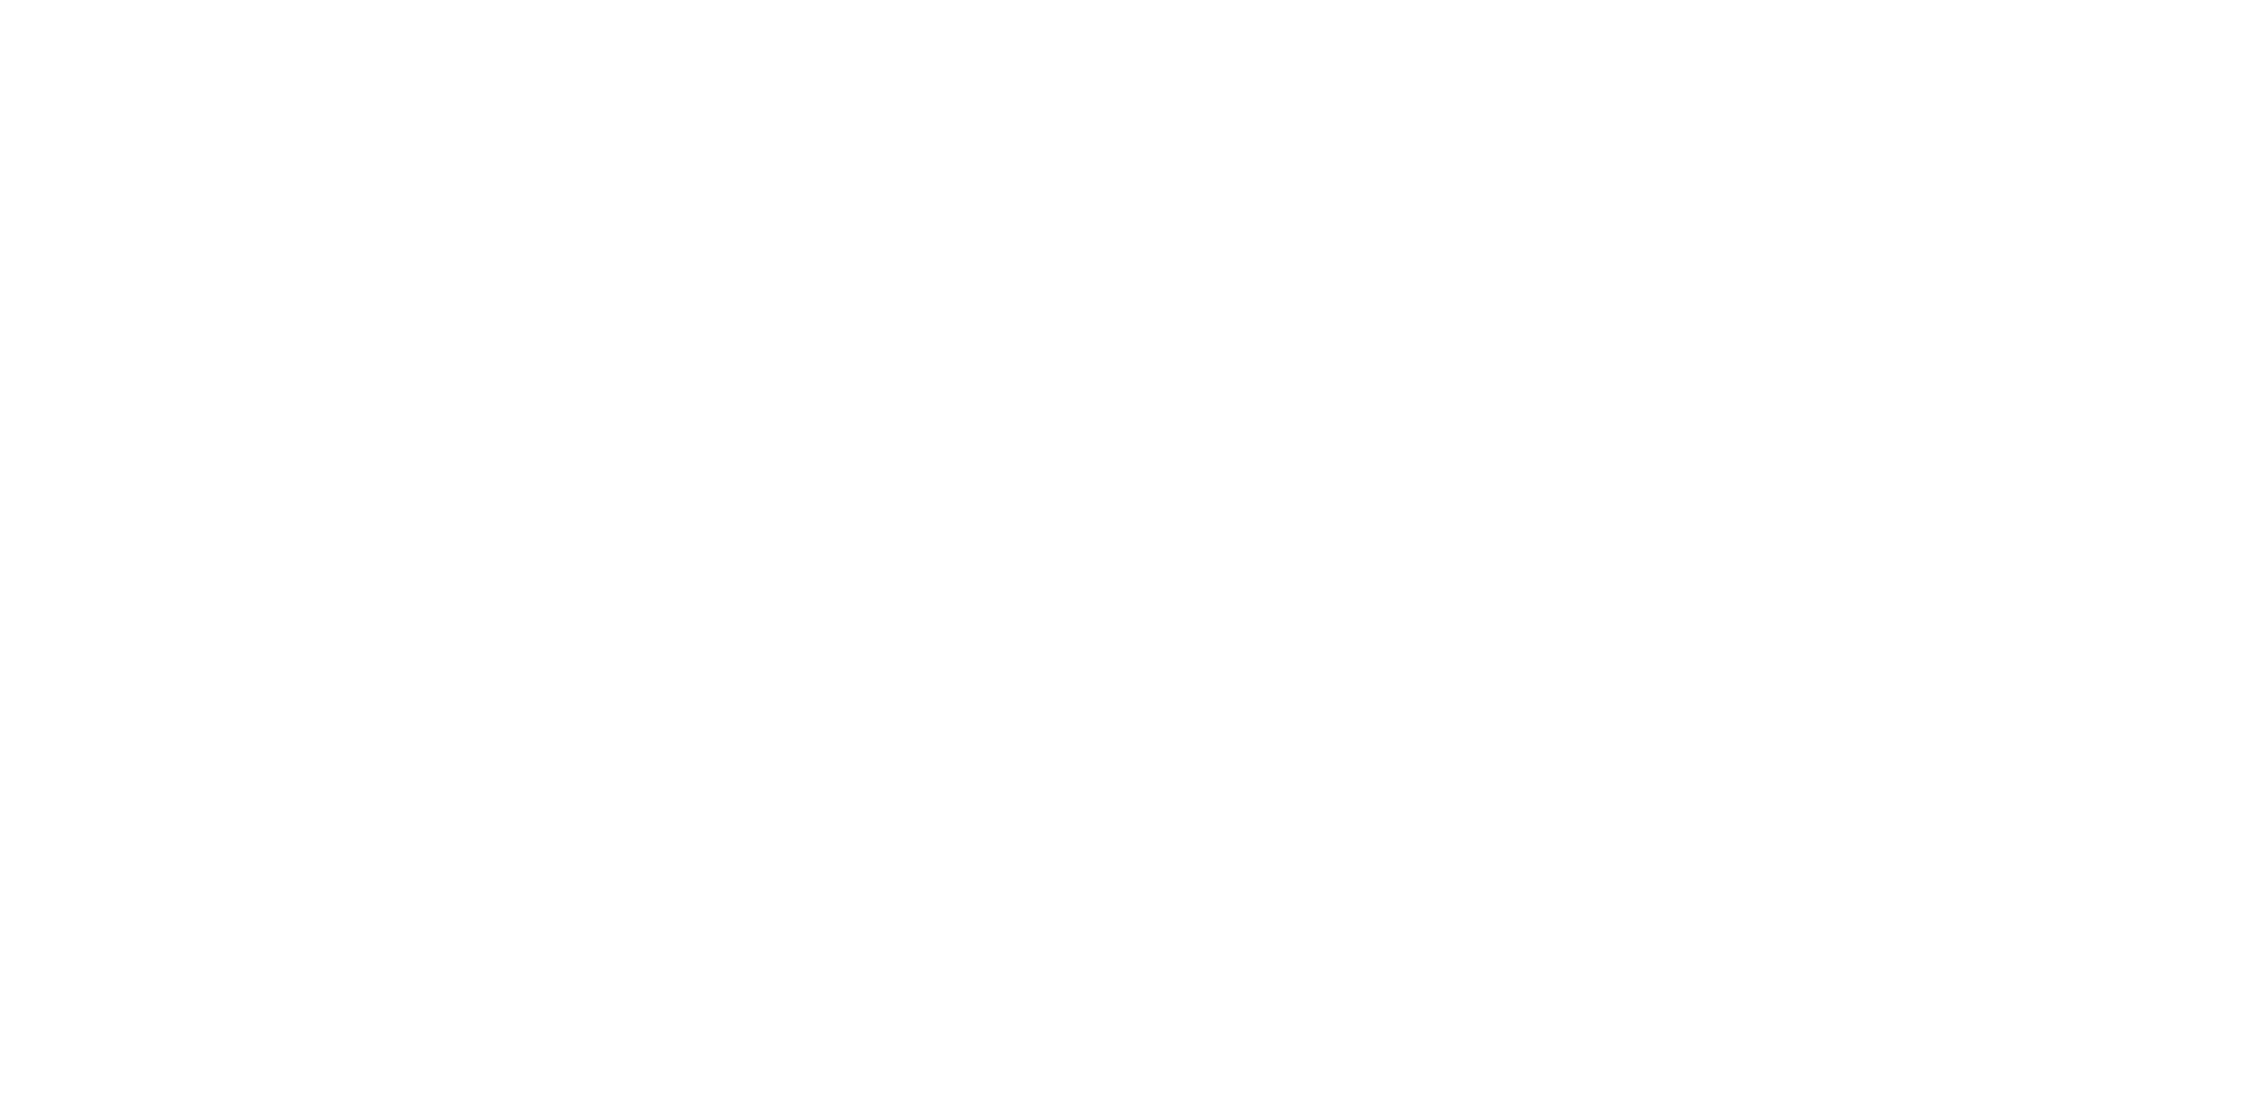

In [431]:
plt.figure(figsize=(20,10))
plot_tree(
    tree
    , filled=True
    , feature_names=features
    , proportion = True
)
plt.show()

In [0]:
data['yhat_tree'] = tree.predict(data[features])
data['yhat_tree_proba'] = tree.predict_proba(data[features])[:,1]
(
    data[['yhat_tree','yhat_tree_proba']]
    .drop_duplicates()
    .sort_values('yhat_tree_proba')
)

###### **Importancia de las variables**



In [0]:
importances = (
    pd.DataFrame({
        'feature':features,
        'importance':tree.feature_importances_
    })
    .sort_values('importance', ascending=False)
)
importances.head()

In [0]:
feature_names = list(data.columns)
colors = plt.cm.hot(np.linspace(0, 1, len(feature_names)))

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances.importance, align='center',color=colors)
plt.yticks(range(len(importances)), importances.feature)
for i, v in enumerate(importances['importance']):
    plt.text(v+0.001 , i, str(round(v, 3)), ha='left', va='center', fontsize=10)
    
plt.xlabel('Importancia de las Variables')
plt.title('Importancia de las Variables en el Modelo de Árbol de Decisión CART')
plt.gca().invert_yaxis() 
plt.show()

Observamos que la variable más importante es aquella que representa el éxito de la anterior campaña, con un aporte de un $81.3\%$ al árbol.

Las siguientes variables más importantes son la edad, con un aporte de un $14.95\%$, y el saldo promedio anual, con un aporte de un $3.75\%$.

El resto de variables no son importantes en el modelo.



###### **Evaluación del modelo**

Volvamos a ajustar el modelo, pero esta vez usando el train y el test para poder evaluar el modelo de forma insesgada.



In [0]:
tree.fit(features_train, target_train)

yhat_tree_test = tree.predict(features_test)
yhat_tree_test_proba = tree.predict_proba(features_test)[:,1]

In [0]:
from sklearn.metrics import accuracy_score

# Ratio de acierto (accuracy)
accuracy_score(target_test, yhat_tree_test, normalize=True)

In [0]:
from sklearn.metrics import cohen_kappa_score

# Coeficiente kappa
cohen_kappa_score(target_test, yhat_tree_test)

In [0]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Horizontal: Target
# Vetical: Modelo
confusion_matrix(target_test, yhat_tree_test)

In [0]:
tn, fp, fn, tp = confusion_matrix(target_test, yhat_tree_test).ravel()

False_Positive_Rate = fp / (fp + tp)
False_Negative_Rate = fn / (fn + tn)

print(f"Ratio Falsos Positivos (Error Tipo I): {False_Positive_Rate}")
print(f"Ratio Falsos Negativos (Error Tipo II): {False_Negative_Rate}")

In [0]:
ConfusionMatrixDisplay.from_estimator(
    estimator = tree,
    X = features_test,
    y = target_test,
    cmap = plt.cm.Blues,
    normalize = 'pred'
)
plt.show()

# Ratios respecto del modelo
confusion_matrix(target_test,  yhat_tree_test, normalize='pred')

In [0]:
ConfusionMatrixDisplay.from_estimator(
    estimator = tree,
    X = features_test,
    y = target_test,
    cmap = plt.cm.Blues,
    normalize = 'true'
)
plt.show()

# Ratios respecto de la target
confusion_matrix(target_test, yhat_tree_test, normalize='true')

In [0]:
from sklearn.metrics import precision_score

# Precisión
precision_score(target_test,  yhat_tree_test)

In [0]:
from sklearn.metrics import recall_score

# Exhaustividad (recall)
recall_score(target_test,  yhat_tree_test)

Se pierden demasiados positivos. Probamos a cambiar el umbral de clasificación. Para buscar el mejor threshold, podemos usar la curva Precisión-Recall:

In [432]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(target_test,  yhat_tree_test_proba)

model_thresholds = pd.DataFrame({
    'threshold': list(thresholds)+[1],
    'precision': precision,
    'recall': recall
}).sort_values('threshold', ascending=False)
model_thresholds

,threshold,precision,recall
4,1.000000,1.000000,0.000000
3,0.679612,0.590909,0.132653
2,0.357143,0.470588,0.163265
1,0.093200,0.108407,1.000000
0,0.000000,0.108287,1.000000


Solo nos salen 5 thresholds en la curva porque nuestro modelo es un árbol de decisión con 4 nodos hoja.

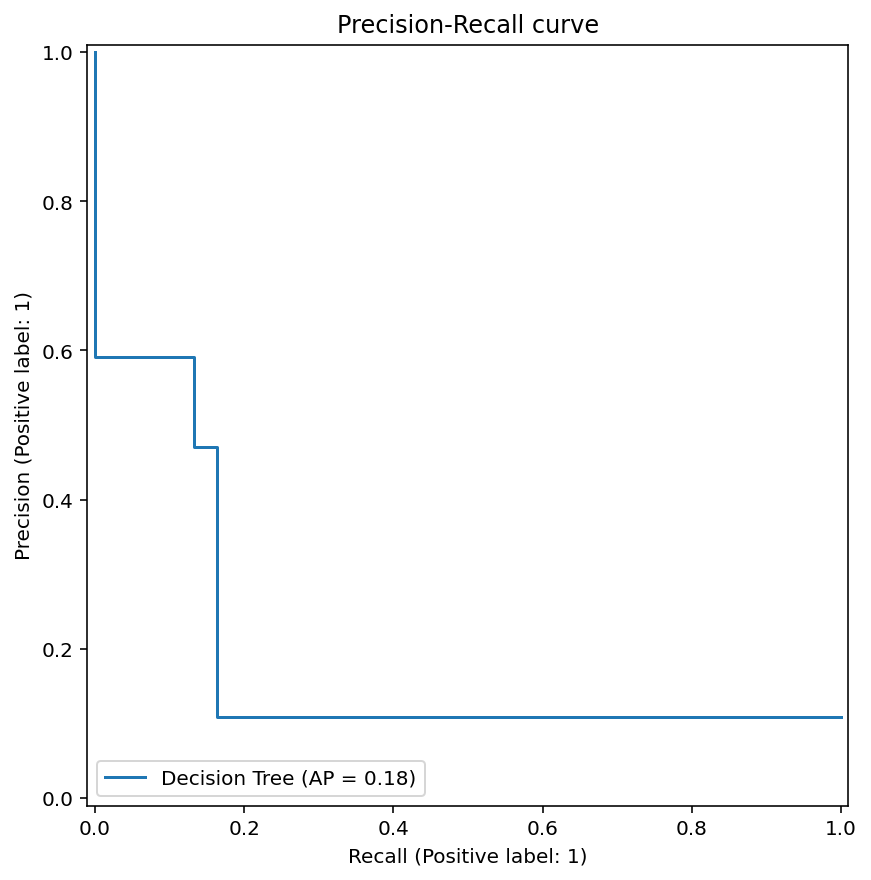

In [433]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(
    target_test,
    yhat_tree_test_proba,
    name="Decision Tree"
)
_ = display.ax_.set_title("Precision-Recall curve")

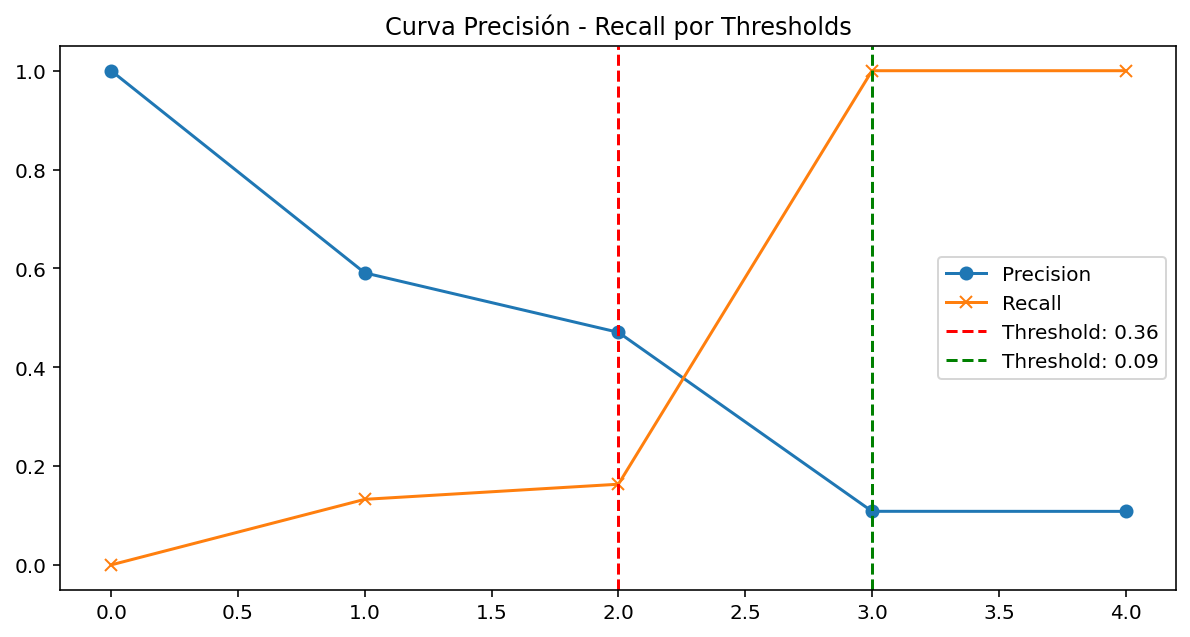

In [434]:
model_thresholds.sort_values('threshold', ascending=False, inplace=True)

i = 2
t0 = model_thresholds.threshold.to_list()[i]

j = 3
t1 = model_thresholds.threshold.to_list()[j]

x = range(len(model_thresholds))

plt.figure(figsize=(10, 5)) 
plt.plot(x, model_thresholds.precision, label='Precision', marker='o')  
plt.plot(x, model_thresholds.recall, label='Recall', marker='x')  
plt.axvline(x=i, color='r', label=f"Threshold: {t0:.2f}", linestyle='--')
plt.axvline(x=j, color='g', label=f"Threshold: {t1:.2f}", linestyle='--')
plt.title("Curva Precisión - Recall por Thresholds")
plt.legend()

El punto de corte de ambas rectas se da para un umbral mayor que $0.093200$ y menor que $0.357143$. Probamos por ejemplo con $0.3$:



In [0]:
# Ratio de acierto (accuracy)
accuracy_score(target_test, yhat_tree_test_proba >= 0.3, normalize=True)

In [0]:
# Coeficiente kappa
cohen_kappa_score(target_test, yhat_tree_test_proba >= 0.3)

In [0]:
# Horizontal: Target
# Vetical: Modelo
confusion_matrix(target_test, yhat_tree_test_proba >= 0.3)

In [0]:
tn, fp, fn, tp = confusion_matrix(target_test, yhat_tree_test_proba >= 0.3).ravel()

False_Positive_Rate = fp / (fp + tp)
False_Negative_Rate = fn / (fn + tn)

print(f"Ratio Falsos Positivos (Error Tipo I): {False_Positive_Rate}")
print(f"Ratio Falsos Negativos (Error Tipo II): {False_Negative_Rate}")

In [0]:
# Precisión
precision_score(target_test, yhat_tree_test_proba >= 0.3)

In [0]:
# Exhaustividad (recall)
recall_score(target_test,  yhat_tree_test_proba >= 0.3)

En este caso, disminuyen el ratio de acierto y la precisión, pero al menos conseguimos aumentar la exhaustividad, que es lo que nos interesaba, pues preferimos predecir a los clientes que sí se suscribiran antes que los que no se suscribirán.

In [436]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(target_test, yhat_tree_test_proba)

pd.DataFrame({
    'threshold': thresholds,
    'tpr': tpr,
    'fpr': fpr
}).sort_values('threshold', ascending=False).head()

,threshold,tpr,fpr
0,inf,0.000000,0.000000
1,0.679612,0.132653,0.011152
2,0.357143,0.163265,0.022305
3,0.093200,1.000000,0.998761
4,0.000000,1.000000,1.000000


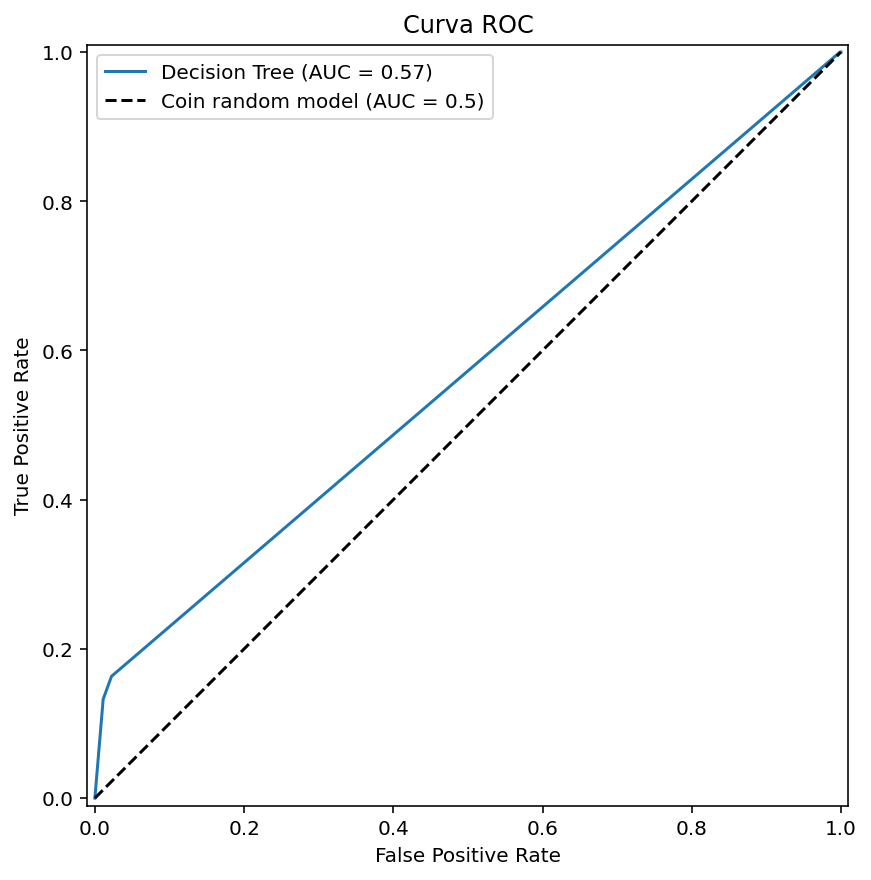

In [437]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Area Under the Curve
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(
    fpr=fpr, 
    tpr=tpr, 
    roc_auc=roc_auc,
    estimator_name='Decision Tree'
)
display.plot() 

plt.title("Curva ROC")
plt.plot([0, 1], [0, 1], "k--", label="Coin random model (AUC = 0.5)")
plt.legend()

In [438]:
from sklearn.metrics import roc_auc_score

roc_auc_score(target_test, yhat_tree_test_proba, average=None)

0.5715676605214577

El modelo es algo mejor que el azar, pues el AUC es de $0.57$, mayor que $0.5$, pero no es una gran mejora.

In [439]:
yhat_tree_train = tree.predict(features_train)
yhat_tree_train_proba = tree.predict_proba(features_train)[:, 1]

# Ratio de acierto (accuracy)
accuracy_score(target_train, yhat_tree_train_proba>=0.3, normalize=True)

0.8855088495575221

In [440]:
# Precisión
precision_score(target_train,  yhat_tree_train_proba>=0.3)

0.5223880597014925

In [441]:
# Exhaustividad (recall)
recall_score(target_train,  yhat_tree_train_proba>=0.3)

0.24822695035460993

No parece que haya overfitting.

## **Modelo 3: Xboost. Boosting**



In [467]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
pct_val = 0.20
pct_test = 0.10
features_train, features_test ,target_train, target_test = train_test_split(data[features], data[['target']], test_size=pct_test, random_state=42)
features_train, features_val, target_train, target_val = train_test_split(features_train, target_train, test_size= pct_val/(1-pct_test), random_state=42)

# Mientras más observaciones mejor ya que podremos entrenar mejor el modelo

In [468]:
import multiprocessing

# Entrenar el modelo
 
model= xgb.XGBClassifier(
    n_estimators=1000,
    max_depth=10,
    max_leaves=None,
    learning_rate = 0.001, 
    gamma=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    n_jobs=multiprocessing.cpu_count()
)

# Ajustar el modelo

model.fit(
    features_train,
    target_train.target,
    eval_set=[(features_val, target_val.target)],
    early_stopping_rounds=5,
    eval_metric='logloss', 
    verbose=True
)
 
 

[0]	validation_0-logloss:0.69252
[1]	validation_0-logloss:0.69189
[2]	validation_0-logloss:0.69126
[3]	validation_0-logloss:0.69063


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.69000
[5]	validation_0-logloss:0.68938
[6]	validation_0-logloss:0.68875
[7]	validation_0-logloss:0.68813
[8]	validation_0-logloss:0.68751
[9]	validation_0-logloss:0.68689
[10]	validation_0-logloss:0.68627
[11]	validation_0-logloss:0.68565
[12]	validation_0-logloss:0.68503
[13]	validation_0-logloss:0.68441
[14]	validation_0-logloss:0.68380
[15]	validation_0-logloss:0.68319
[16]	validation_0-logloss:0.68258
[17]	validation_0-logloss:0.68196
[18]	validation_0-logloss:0.68136
[19]	validation_0-logloss:0.68075
[20]	validation_0-logloss:0.68014
[21]	validation_0-logloss:0.67954
[22]	validation_0-logloss:0.67893
[23]	validation_0-logloss:0.67833
[24]	validation_0-logloss:0.67773
[25]	validation_0-logloss:0.67713
[26]	validation_0-logloss:0.67653
[27]	validation_0-logloss:0.67594
[28]	validation_0-logloss:0.67534
[29]	validation_0-logloss:0.67474
[30]	validation_0-logloss:0.67415
[31]	validation_0-logloss:0.67356
[32]	validation_0-logloss:0.67297
[33]	validation_0-lo

[241]	validation_0-logloss:0.57068
[242]	validation_0-logloss:0.57028
[243]	validation_0-logloss:0.56988
[244]	validation_0-logloss:0.56947
[245]	validation_0-logloss:0.56908
[246]	validation_0-logloss:0.56868
[247]	validation_0-logloss:0.56827
[248]	validation_0-logloss:0.56787
[249]	validation_0-logloss:0.56747
[250]	validation_0-logloss:0.56707
[251]	validation_0-logloss:0.56668
[252]	validation_0-logloss:0.56629
[253]	validation_0-logloss:0.56589
[254]	validation_0-logloss:0.56549
[255]	validation_0-logloss:0.56509
[256]	validation_0-logloss:0.56470
[257]	validation_0-logloss:0.56432
[258]	validation_0-logloss:0.56392
[259]	validation_0-logloss:0.56353
[260]	validation_0-logloss:0.56313
[261]	validation_0-logloss:0.56274
[262]	validation_0-logloss:0.56236
[263]	validation_0-logloss:0.56197
[264]	validation_0-logloss:0.56158
[265]	validation_0-logloss:0.56119
[266]	validation_0-logloss:0.56080
[267]	validation_0-logloss:0.56042
[268]	validation_0-logloss:0.56004
[269]	validation_0-l

[476]	validation_0-logloss:0.49262
[477]	validation_0-logloss:0.49234
[478]	validation_0-logloss:0.49207
[479]	validation_0-logloss:0.49179
[480]	validation_0-logloss:0.49151
[481]	validation_0-logloss:0.49125
[482]	validation_0-logloss:0.49098
[483]	validation_0-logloss:0.49070
[484]	validation_0-logloss:0.49043
[485]	validation_0-logloss:0.49015
[486]	validation_0-logloss:0.48990
[487]	validation_0-logloss:0.48962
[488]	validation_0-logloss:0.48935
[489]	validation_0-logloss:0.48908
[490]	validation_0-logloss:0.48880
[491]	validation_0-logloss:0.48853
[492]	validation_0-logloss:0.48828
[493]	validation_0-logloss:0.48801
[494]	validation_0-logloss:0.48774
[495]	validation_0-logloss:0.48747
[496]	validation_0-logloss:0.48720
[497]	validation_0-logloss:0.48693
[498]	validation_0-logloss:0.48668
[499]	validation_0-logloss:0.48641
[500]	validation_0-logloss:0.48614
[501]	validation_0-logloss:0.48588
[502]	validation_0-logloss:0.48561
[503]	validation_0-logloss:0.48534
[504]	validation_0-l

[711]	validation_0-logloss:0.43968
[712]	validation_0-logloss:0.43950
[713]	validation_0-logloss:0.43932
[714]	validation_0-logloss:0.43913
[715]	validation_0-logloss:0.43895
[716]	validation_0-logloss:0.43877
[717]	validation_0-logloss:0.43859
[718]	validation_0-logloss:0.43841
[719]	validation_0-logloss:0.43823
[720]	validation_0-logloss:0.43805
[721]	validation_0-logloss:0.43787
[722]	validation_0-logloss:0.43770
[723]	validation_0-logloss:0.43752
[724]	validation_0-logloss:0.43734
[725]	validation_0-logloss:0.43716
[726]	validation_0-logloss:0.43699
[727]	validation_0-logloss:0.43681
[728]	validation_0-logloss:0.43663
[729]	validation_0-logloss:0.43646
[730]	validation_0-logloss:0.43628
[731]	validation_0-logloss:0.43611
[732]	validation_0-logloss:0.43593
[733]	validation_0-logloss:0.43576
[734]	validation_0-logloss:0.43558
[735]	validation_0-logloss:0.43540
[736]	validation_0-logloss:0.43523
[737]	validation_0-logloss:0.43505
[738]	validation_0-logloss:0.43488
[739]	validation_0-l

[946]	validation_0-logloss:0.40430
[947]	validation_0-logloss:0.40417
[948]	validation_0-logloss:0.40405
[949]	validation_0-logloss:0.40392
[950]	validation_0-logloss:0.40380
[951]	validation_0-logloss:0.40368
[952]	validation_0-logloss:0.40355
[953]	validation_0-logloss:0.40343
[954]	validation_0-logloss:0.40331
[955]	validation_0-logloss:0.40319
[956]	validation_0-logloss:0.40306
[957]	validation_0-logloss:0.40294
[958]	validation_0-logloss:0.40282
[959]	validation_0-logloss:0.40270
[960]	validation_0-logloss:0.40258
[961]	validation_0-logloss:0.40246
[962]	validation_0-logloss:0.40234
[963]	validation_0-logloss:0.40222
[964]	validation_0-logloss:0.40210
[965]	validation_0-logloss:0.40197
[966]	validation_0-logloss:0.40186
[967]	validation_0-logloss:0.40173
[968]	validation_0-logloss:0.40161
[969]	validation_0-logloss:0.40150
[970]	validation_0-logloss:0.40137
[971]	validation_0-logloss:0.40125
[972]	validation_0-logloss:0.40114
[973]	validation_0-logloss:0.40102
[974]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [469]:
import functools 

importances = ['gain', 'weight', 'cover', 'total_gain', 'total_cover']

importance = [
    pd.DataFrame.from_dict(
        model._Booster.get_score(importance_type=i)
        , orient='index'
        , columns=[i]
    )
    for i in importances
]

importance_df = functools.reduce(
    lambda x, y: pd.merge(x,y,how='outer',left_index=True, right_index=True)
    , importance
)

importance_df

,gain,weight,cover,total_gain,total_cover
age,2.024800,12291.0,81.120575,24886.812500,997053.000000
balance,1.908562,16115.0,40.572487,30756.482422,653825.625000
day,1.913011,10270.0,29.697851,19646.621094,304996.937500
campaign,1.305366,3183.0,23.105850,4154.979004,73545.921875
pdays,1.446567,5350.0,105.937019,7739.131348,566763.062500
previous,1.252446,4362.0,75.053085,5463.169434,327381.562500
default_num,2.251142,207.0,52.730900,465.986298,10915.295898
housing_num,2.410085,2116.0,43.487011,5099.739746,92018.515625
loan_num,2.354332,775.0,19.734379,1824.607666,15294.143555
education_num,1.703608,2374.0,32.974304,4044.364258,78281.000000


In [470]:
importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_}
)
importance.sort_values('importance', ascending=False, inplace=True)
importance.head()


,feature,importance
31,poutcome_success,0.518230
28,contact_unknown,0.047824
26,contact_cellular,0.044092
24,married,0.035216
7,housing_num,0.021042


In [471]:
importance_df / importance_df.apply(np.sum, axis=0)

,gain,weight,cover,total_gain,total_cover
age,0.017678,0.164852,0.021272,0.126456,0.174312
balance,0.016663,0.216140,0.010639,0.156282,0.114306
day,0.016702,0.137745,0.007788,0.099830,0.053322
campaign,0.011397,0.042692,0.006059,0.021113,0.012858
pdays,0.012630,0.071756,0.027780,0.039325,0.099085
previous,0.010935,0.058505,0.019681,0.027760,0.057235
default_num,0.019654,0.002776,0.013828,0.002368,0.001908
housing_num,0.021042,0.028381,0.011404,0.025913,0.016087
loan_num,0.020555,0.010395,0.005175,0.009271,0.002674
education_num,0.014874,0.031841,0.008647,0.020550,0.013686


In [472]:
importance_df / importance_df.apply(np.sum, axis=0)

,gain,weight,cover,total_gain,total_cover
age,0.017678,0.164852,0.021272,0.126456,0.174312
balance,0.016663,0.216140,0.010639,0.156282,0.114306
day,0.016702,0.137745,0.007788,0.099830,0.053322
campaign,0.011397,0.042692,0.006059,0.021113,0.012858
pdays,0.012630,0.071756,0.027780,0.039325,0.099085
previous,0.010935,0.058505,0.019681,0.027760,0.057235
default_num,0.019654,0.002776,0.013828,0.002368,0.001908
housing_num,0.021042,0.028381,0.011404,0.025913,0.016087
loan_num,0.020555,0.010395,0.005175,0.009271,0.002674
education_num,0.014874,0.031841,0.008647,0.020550,0.013686


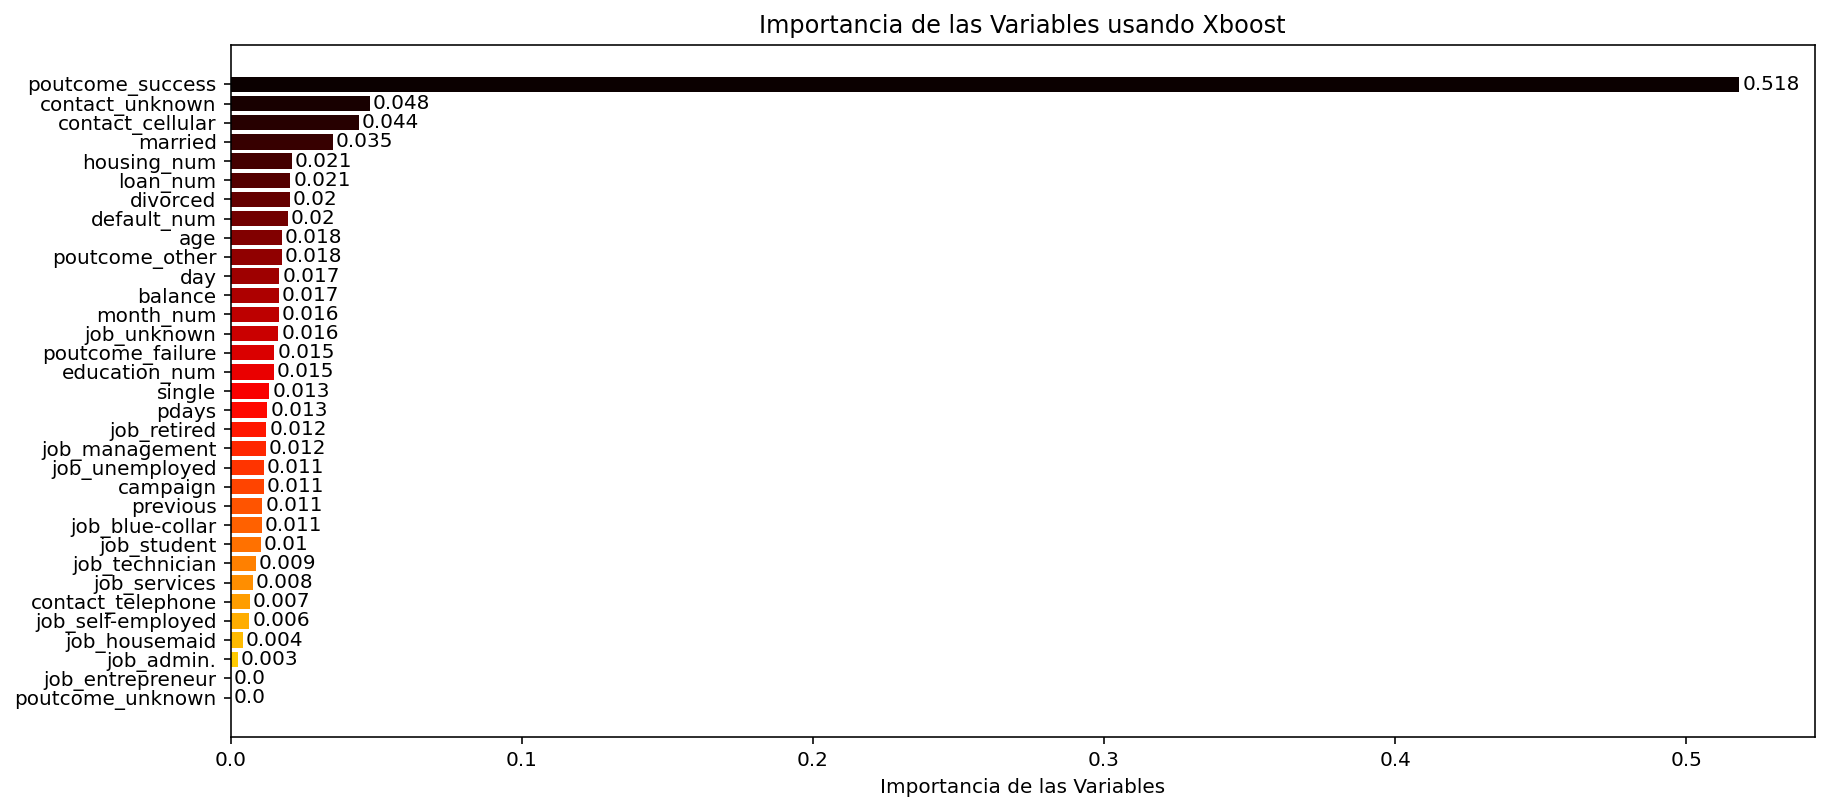

In [473]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance.importance, align='center',color=colors)
plt.yticks(range(len(importance)), importance.feature)
for i, v in enumerate(importance['importance']):
    plt.text(v+0.001 , i, str(round(v, 3)), ha='left', va='center', fontsize=10)

plt.xlabel('Importancia de las Variables')
plt.title('Importancia de las Variables usando Xboost')
plt.gca().invert_yaxis() 
plt.subplots_adjust(left=0.3, right=1.4, top=0.9, bottom=0.1)
plt.show()

Observamos que la variable que influye más en nuestra variable target es de nuevo la variable poutcome\_succes \(éxito en las campañas anteriores\), seguida de la variable contact\_unknown.  



###### **Evaluación del modelo**



In [497]:
 
target_hat = model.predict(features_test)
target_hat_test_proba = model.predict_proba(features_test)[:,1]


In [504]:
# Hacer predicciones
target_pred = model.predict(features_test)

# Calcular métricas
accuracy = accuracy_score(target_test, target_pred)
precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
f1 = f1_score(target_test, target_pred)
roc_auc = roc_auc_score(target_test, target_hat_test_proba,average=None)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.9050772626931567
Precision: 0.75
Recall: 0.1276595744680851
F1-Score: 0.21818181818181817
ROC AUC: 0.700057645949062


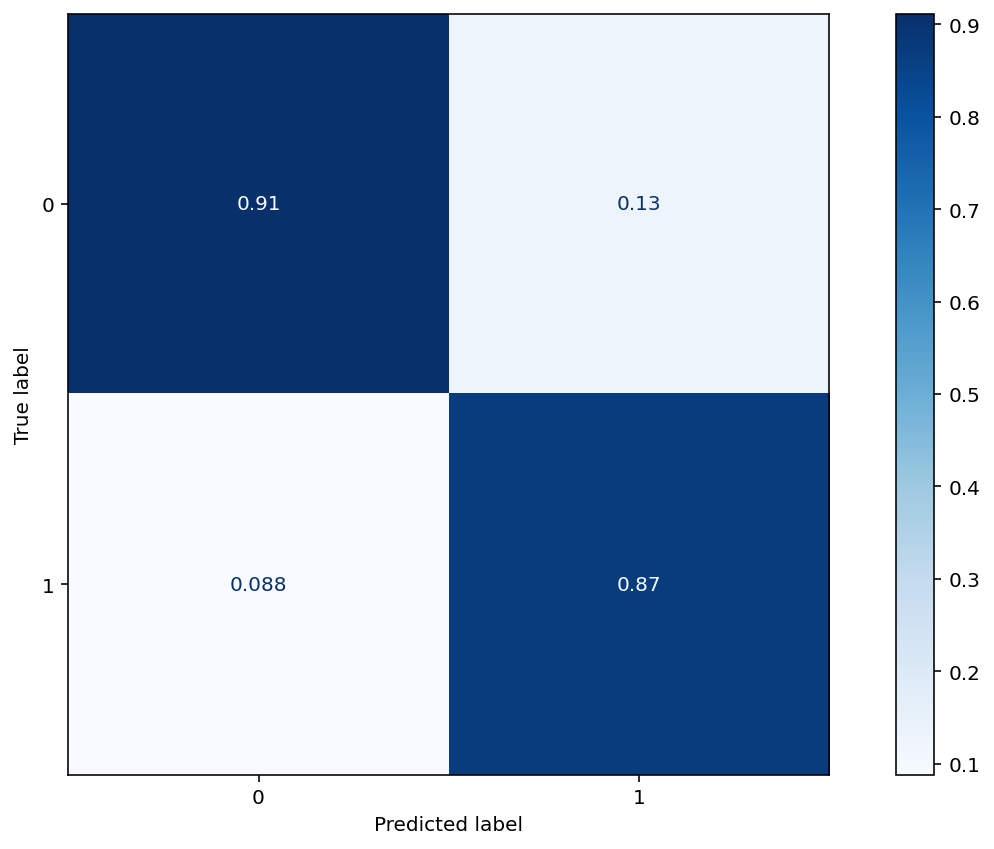

array([[0.90786517, 0.25      ],
       [0.09213483, 0.75      ]])

In [476]:
ConfusionMatrixDisplay.from_estimator(
    estimator = model,
    X = data[features],
    y = data.target,
    cmap = plt.cm.Blues,
    normalize = 'pred'
)
plt.show()

# Ratios respecto del modelo
confusion_matrix(target_test,  target_hat>=0.33 , normalize='pred')

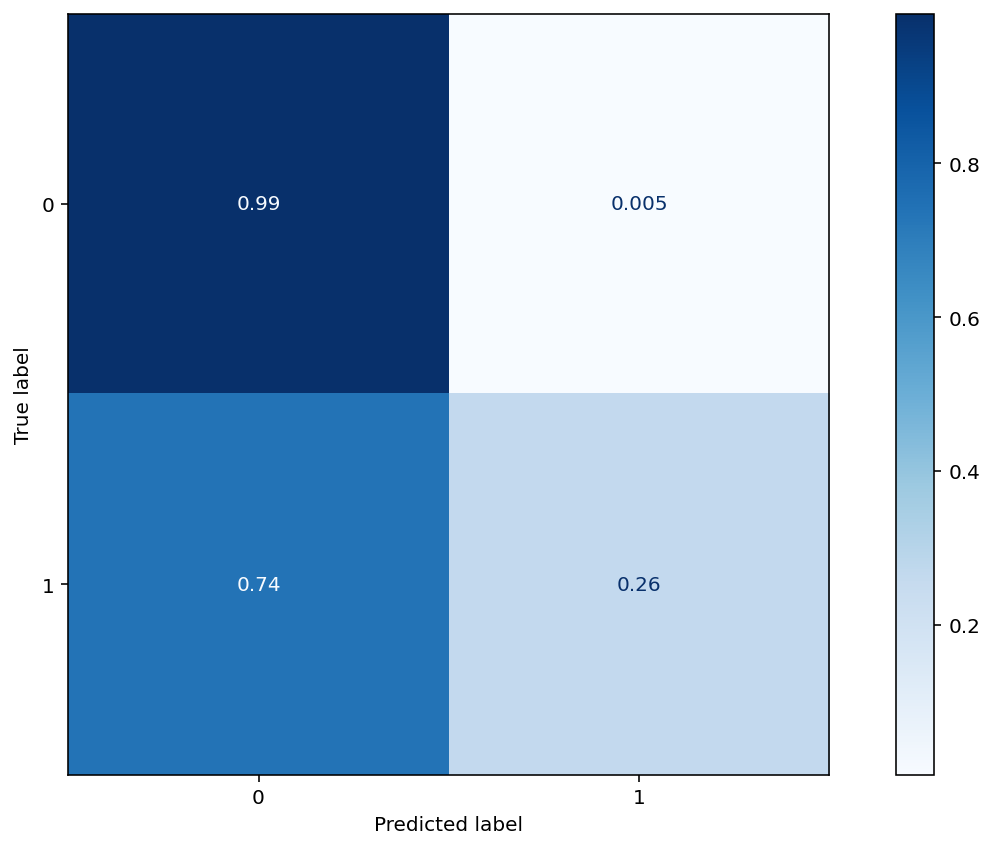

array([[404,   2],
       [ 41,   6]])

In [477]:
ConfusionMatrixDisplay.from_estimator(
    estimator = model,
    X = data[features],
    y = data.target,
    cmap = plt.cm.Blues,
    normalize = 'true'
)
plt.show()

# Ratios respecto del modelo
confusion_matrix(target_test,  target_hat>=0.5 )

In [478]:
from sklearn.metrics import precision_score

# Precisión
precision_score(target_test,  target_hat)

0.75

In [479]:
from sklearn.metrics import recall_score

# Exhaustividad (recall)
recall_score(target_test,  target_hat)

0.1276595744680851

In [480]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(target_test,  target_hat_test_proba)

model_thresholds = pd.DataFrame({
    'threshold': list(thresholds)+[1],
    'precision': precision,
    'recall': recall
}).sort_values('threshold', ascending=False)
model_thresholds

,threshold,precision,recall
343,1.000000,1.000000,0.000000
342,0.757477,1.000000,0.021277
341,0.751115,1.000000,0.042553
340,0.750433,1.000000,0.063830
339,0.647845,0.750000,0.063830
...,...,...,...
4,0.208356,0.106335,1.000000
3,0.208351,0.106095,1.000000
2,0.208225,0.104213,1.000000
1,0.208096,0.103982,1.000000


In [481]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(target_test,  target_hat_test_proba)

model_thresholds = pd.DataFrame({
    'threshold': list(thresholds)+[1],
    'precision': precision,
    'recall': recall
}).sort_values('threshold', ascending=False)
model_thresholds

,threshold,precision,recall
343,1.000000,1.000000,0.000000
342,0.757477,1.000000,0.021277
341,0.751115,1.000000,0.042553
340,0.750433,1.000000,0.063830
339,0.647845,0.750000,0.063830
...,...,...,...
4,0.208356,0.106335,1.000000
3,0.208351,0.106095,1.000000
2,0.208225,0.104213,1.000000
1,0.208096,0.103982,1.000000


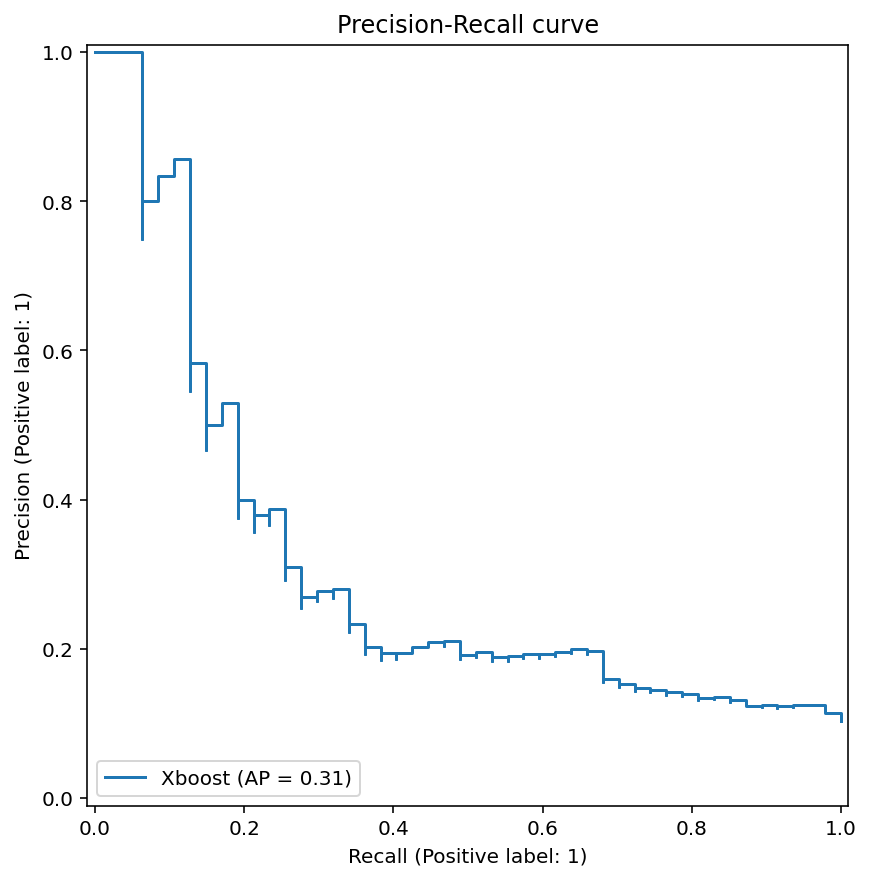

In [482]:

display = PrecisionRecallDisplay.from_predictions(
    target_test,
    target_hat_test_proba,
    name="Xboost"
)
_ = display.ax_.set_title("Precision-Recall curve")

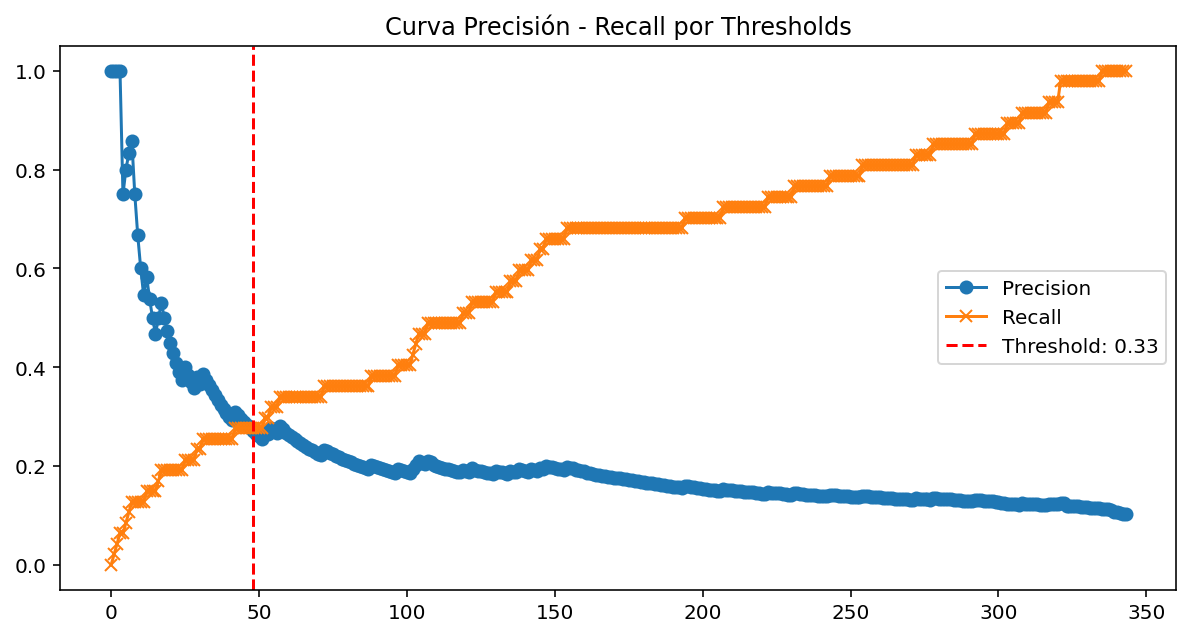

In [501]:
model_thresholds.sort_values('threshold', ascending=False, inplace=True)

i = 48
t0 = model_thresholds.threshold.to_list()[i]


x = range(len(model_thresholds))

plt.figure(figsize=(10, 5)) 
plt.plot(x, model_thresholds.precision, label='Precision', marker='o')  
plt.plot(x, model_thresholds.recall, label='Recall', marker='x')  
plt.axvline(x=i, color='r', label=f"Threshold: {t0:.2f}", linestyle='--')
plt.title("Curva Precisión - Recall por Thresholds")
plt.legend()

In [491]:
# Ratio de acierto (accuracy)
accuracy_score(target_test, target_hat_test_proba >= 0.33, normalize=True)

0.8498896247240618

In [492]:
# Precisión
precision_score(target_test, target_hat_test_proba >= 0.33)

0.2765957446808511

In [493]:
# Exhaustividad (recall)
recall_score(target_test,  target_hat_test_proba >= 0.33)

0.2765957446808511

In [514]:
 
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(target_test, target_hat_test_proba)

pd.DataFrame({
    'threshold': thresholds,
    'tpr': tpr,
    'fpr': fpr
}).sort_values('threshold', ascending=False).head()

,threshold,tpr,fpr
0,inf,0.000000,0.000000
1,0.757477,0.021277,0.000000
2,0.750433,0.063830,0.000000
3,0.647845,0.063830,0.002463
4,0.548168,0.127660,0.002463


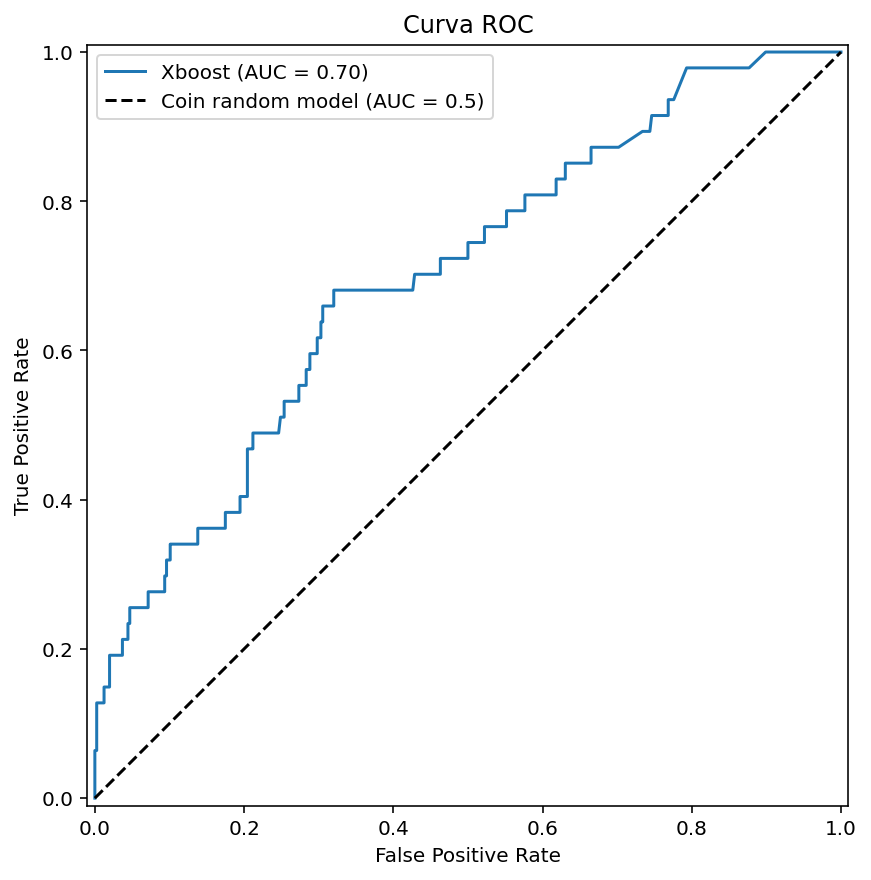

In [515]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Area Under the Curve
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(
    fpr=fpr, 
    tpr=tpr, 
    roc_auc=roc_auc,
    estimator_name='Xboost'
)
display.plot() 

plt.title("Curva ROC")
plt.plot([0, 1], [0, 1], "k--", label="Coin random model (AUC = 0.5)")
plt.legend()

In [354]:
from sklearn.metrics import roc_auc_score

roc_auc_score(target_test, target_hat_test_proba, average=None)

0.6768682528036895

In [355]:
 
target_train = model.predict(features_train)
target_hat_train_proba = model.predict_proba(features_train)[:,1]
 

In [356]:
# Exhaustividad (recall)
recall_score(target_train,  target_hat_train_proba>=0.33)

1.0

<u>**Modelo sobreajustado \- OVERFITING**</u><u> </u>

Estos resultados sugieren que tu modelo puede estar sobreajustando a los datos de entrenamiento, lo que significa que está aprendiendo el “ruido” en los datos de entrenamiento en lugar de las verdaderas   
relaciones subyacentes. Como resultado, no se desempeña bien en los datos de prueba.



## **Modelo 4: Random Forest**



###### **RandomForest en Clasificación**



In [376]:
from sklearn.ensemble import RandomForestClassifier
import multiprocessing

model_c = RandomForestClassifier(
    n_estimators=10,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=5,
    bootstrap=True,
    oob_score=False,
    n_jobs=multiprocessing.cpu_count(),
    random_state=42 #semilla
)
model_c.fit(data[features], data.target)

KeyError: "['default_num', 'housing_num', 'loan_num', 'education_num', 'month_num', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'divorced', 'married', 'single', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown'] not in index"

###### **Evolución del error**



In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features], data[['target']], test_size=0.2, random_state=42)

In [0]:
from sklearn.metrics import accuracy_score

results = []
for n in [1,10,25,50,100,250]:
    
    rf = RandomForestClassifier(
        n_estimators=n,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=5,
        bootstrap=True,
        oob_score=False,
        n_jobs=multiprocessing.cpu_count(),
        random_state=42
    )
    rf.fit(X_train[features], y_train.target)

    y_train_hat = rf.predict(X_train)
    y_test_hat = rf.predict(X_test)

    # Model ROC test
    acc_train = accuracy_score(y_train, y_train_hat)
    acc_test = accuracy_score(y_test, y_test_hat)
    
    results.append((n,acc_train,acc_test))
    
results = pd.DataFrame(results, columns=['n_trees','acc_train','acc_test'])
results

Cuando n\_trees=1, la ratio de acierto en el train es 89.1% y en el test es 88.62%.

A medida que aumenta el número de árboles aumenta la tasa de acierto tanto en train como en test. Cuando el número de árboles aumenta a un cierto nivel \(n\_trees=25 y más\), la tasa de acierto del train ya está cerca de 89.7% y la de test puede alcanzar un pico. Si aumentar aún más el número de árboles, esto conduce a un sobreajuste \(overfitting\), ya que la tasa de acierto en test comienza a disminuir.

Por lo tanto, al elegir la cantidad final de árboles, debe equilibrar el rendimiento y la complejidad del modelo. En este caso, elegir el número de árboles hasta 25 podría ser una buena opción.



In [0]:
plt.plot(results.n_trees, results.acc_train, label='Train acc')
plt.plot(results.n_trees, results.acc_test, label='Test acc')
plt.legend()
plt.title("Evolución de la Accuracy")
plt.xlabel("Número de Árboles")
plt.ylabel("Accuracy")
plt.show()

In [0]:
results = []
for n in [1,2,3,4,5,6,7,8,9,10]:
    
    rf = RandomForestClassifier(
        n_estimators=25,
        max_depth=n,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=5,
        bootstrap=True,
        oob_score=False,
        n_jobs=multiprocessing.cpu_count(),
        random_state=42
    )
    rf.fit(X_train[features], y_train.target)

    y_train_hat = rf.predict(X_train)
    y_test_hat = rf.predict(X_test)

    # Model ROC test
    acc_train = accuracy_score(y_train, y_train_hat)
    acc_test = accuracy_score(y_test, y_test_hat)
    
    results.append((n,acc_train,acc_test))
    
results = pd.DataFrame(results, columns=['max_depth','acc_train','acc_test'])
results

In [0]:
plt.plot(results.max_depth, results.acc_train, label='Train acc')
plt.plot(results.max_depth, results.acc_test, label='Test acc')
plt.legend()
plt.title("Evolución de la Accuracy")
plt.xlabel("Profundidad máxima del árboles")
plt.ylabel("Accuracy")
plt.show()

Observando la curva, a la profundidad 5:

La precisión \(Accuracy\) tanto en el conjunto de entrenamiento \(Train acc\) como en el de prueba \(Test acc\) es bastante alta y muy cercana entre sí. A partir de este punto, la precisión de entrenamiento sigue aumentando, pero la de prueba empieza a separarse ligeramente, lo que podría indicar un leve sobreajuste.

Tomamos max\_depth=5.


In [0]:
results = []
for n in [2,3,4,5,6,7,8,9,10]:
    
    rf = RandomForestClassifier(
        n_estimators=25,
        max_depth=5,
        min_samples_split=n,
        min_samples_leaf=1,
        max_features=5,
        bootstrap=True,
        oob_score=False,
        n_jobs=multiprocessing.cpu_count(),
        random_state=42
    )
    rf.fit(X_train[features], y_train.target)

    y_train_hat = rf.predict(X_train)
    y_test_hat = rf.predict(X_test)

    # Model ROC test
    acc_train = accuracy_score(y_train, y_train_hat)
    acc_test = accuracy_score(y_test, y_test_hat)
    
    results.append((n,acc_train,acc_test))
    
results = pd.DataFrame(results, columns=['min_samples_split','acc_train','acc_test'])
results

In [0]:
plt.plot(results.min_samples_split, results.acc_train, label='Train acc')
plt.plot(results.min_samples_split, results.acc_test, label='Test acc')
plt.legend()
plt.title("Evolución de la Accuracy")
plt.xlabel("Número mínimo de muestras para dividir un nodo")
plt.ylabel("Accuracy")
plt.show()

Tomamos min\_samples\_split=2, ya  que a partir de ahí, a medida que aumenta el número mínimo de muestras, la precisión de entrenamiento sigue subiendo, pero la de prueba comienza a disminuir ligeramente, lo que podría indicar un leve sobreajuste.


In [0]:
results = []
for n in [1,2,3,4,5,6,7,8,9,10]:
    
    rf = RandomForestClassifier(
        n_estimators=25,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=n,
        max_features=5,
        bootstrap=True,
        oob_score=False,
        n_jobs=multiprocessing.cpu_count(),
        random_state=42
    )
    rf.fit(X_train[features], y_train.target)

    y_train_hat = rf.predict(X_train)
    y_test_hat = rf.predict(X_test)

    # Model ROC test
    acc_train = accuracy_score(y_train, y_train_hat)
    acc_test = accuracy_score(y_test, y_test_hat)
    
    results.append((n,acc_train,acc_test))
    
results = pd.DataFrame(results, columns=['min_samples_leaf','acc_train','acc_test'])
results

In [0]:
plt.plot(results.min_samples_leaf, results.acc_train, label='Train acc')
plt.plot(results.min_samples_leaf, results.acc_test, label='Test acc')
plt.legend()
plt.title("Evolución de la Accuracy")
plt.xlabel("Número mínimo de muestras en un nodo hoja")
plt.ylabel("Accuracy")
plt.show()

Tomamos min\_samples\_leaf=1.



In [0]:
results = []
for n in [3,4,5,6,7,8,9,10]:
    
    rf = RandomForestClassifier(
        n_estimators=25,
        max_depth=5,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=n,
        bootstrap=True,
        oob_score=False,
        n_jobs=multiprocessing.cpu_count(),
        random_state=42
    )
    rf.fit(X_train[features], y_train.target)

    y_train_hat = rf.predict(X_train)
    y_test_hat = rf.predict(X_test)

    # Model ROC test
    acc_train = accuracy_score(y_train, y_train_hat)
    acc_test = accuracy_score(y_test, y_test_hat)
    
    results.append((n,acc_train,acc_test))
    
results = pd.DataFrame(results, columns=['max_features','acc_train','acc_test'])
results

In [0]:
plt.plot(results.max_features, results.acc_train, label='Train acc')
plt.plot(results.max_features, results.acc_test, label='Test acc')
plt.legend()
plt.title("Evolución de la Accuracy")
plt.xlabel("Número máximo de características")
plt.ylabel("Accuracy")
plt.show()

Tomamos max\_features=5.



###### **Importancia de las variables**



In [0]:
#n_estimators=25, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=5
best_model_c = RandomForestClassifier(
    n_estimators=25, 
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=5,
    bootstrap=True,
    oob_score=False,
    n_jobs=multiprocessing.cpu_count()
    ,random_state=42 #semilla
)
best_model_c.fit(data[features], data.target)

importance = pd.DataFrame({
    'feature': features,
    'importance': best_model_c.feature_importances_}
)
importance.sort_values('importance', ascending=False, inplace=True)
importance.head()


In [0]:
feature_names = list(data.columns)
colors = plt.cm.hot(np.linspace(0, 1, len(feature_names))) #plt.cm.rainbow


In [0]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance.importance, align='center',color=colors)
plt.yticks(range(len(importance)), importance.feature)
for i, v in enumerate(importance['importance']):
    plt.text(v+0.001 , i, str(round(v, 3)), ha='left', va='center', fontsize=10)

plt.xlabel('Importancia de las Variables')
plt.title('Importancia de las Variables en el RandomForest')
plt.gca().invert_yaxis() 
plt.subplots_adjust(left=0.3, right=1.4, top=0.9, bottom=0.1)
plt.show()

Observamos que la variable más importante es aquella que representa el éxito de la anterior campaña, con un aporte de un 23.4%.

Las siguientes variables más importantes son la edad, con un aporte de un 12.1% y el pday \(número de días desde el última contacto\), con un aporte de un 11.1%.


###### **Plot a tree**



In [0]:
from sklearn.tree import plot_tree

single_tree = best_model_c.estimators_[5]

plt.figure(figsize = (10, 10))
plot_tree(
    single_tree
    , feature_names = features
    , filled = True
    , impurity = False
    , proportion = True
)

###### **Metricas para Clasificación**



In [0]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report, cohen_kappa_score,  ConfusionMatrixDisplay
)

best_model_c.fit(data[features], data.target)
best_model_c.fit(X_train, y_train)
yhat_rf_test = best_model_c.predict(X_test)
yhat_rf_test_proba = best_model_c.predict_proba(X_test)[:, 1]

In [0]:
accuracy = accuracy_score(y_test, yhat_rf_test, normalize=True)
kappa = cohen_kappa_score(y_test, yhat_rf_test)
precision = precision_score(y_test, yhat_rf_test)
recall = recall_score(y_test, yhat_rf_test)
f1 = f1_score(y_test, yhat_rf_test)
roc_auc = roc_auc_score(y_test, yhat_rf_test_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Kappa: {kappa:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

In [0]:
# Por Scikit Learn
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat_rf_test))

Aunque Acc del modelo alcanza 0.90, Precision, coeficiente de Kappa y F1 Score son bajos. Esto lo que indica que el modelo tiene margen de mejora en el reconocimiento de categorías positivas.



###### **Tabla de confusión**



In [0]:
conf_matrix = confusion_matrix(y_test, yhat_rf_test)
print('Tabla de confusión:')
print(conf_matrix)

In [0]:
#Errores Tipo I, II
tn, fp, fn, tp = confusion_matrix(y_test, yhat_rf_test).ravel()

False_Positive_Rate = fp / (fp + tp)
False_Negative_Rate = fn / (fn + tn)

print(f"Ratio Falsos Positivos (Error Tipo I): {False_Positive_Rate}")
print(f"Ratio Falsos Negativos (Error Tipo II): {False_Negative_Rate}")

In [0]:
#Ratios respecto del Modelo
ConfusionMatrixDisplay.from_estimator(
    estimator = best_model_c,
    X = X_test,
    y = y_test,
    cmap = plt.cm.Blues,
    normalize = 'pred'
)
plt.show()

confusion_matrix(y_test, yhat_rf_test, normalize='pred')

In [0]:
#Ratios respecto de la Target
ConfusionMatrixDisplay.from_estimator(
    estimator = best_model_c,
    X = X_test,
    y = y_test,
    cmap = plt.cm.Blues,
    normalize = 'true'
)
plt.show()

confusion_matrix(y_test, yhat_rf_test, normalize='true')

In [0]:
# Cálculo de diferentes pares de Precisión y Recall

threshold = np.linspace(0,1,10)
precision = [precision_score(y_test, yhat_rf_test_proba >= t, zero_division=0) for t in threshold]
recall = [recall_score(y_test, yhat_rf_test_proba >= t) for t in threshold]

pd.DataFrame({
    'threshold': threshold,
    'precision': precision,
    'recall': recall
}).sort_values('threshold', ascending=False)



In [0]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, yhat_rf_test_proba)

model_thresholds = pd.DataFrame({
    'threshold': list(thresholds)+[1],
    'precision': precision,
    'recall': recall
}).sort_values('threshold', ascending=False)
model_thresholds

In [0]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(
    y_test,
    yhat_rf_test_proba,
    name="RF"
)
_ = display.ax_.set_title("Precision-Recall curve")

In [0]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, yhat_rf_test_proba)

Cuanto mayor sea el valor AP, mejor será el rendimiento general del modelo bajo diferentes umbrales. Como el valor AP es 0,31, lo que indica que el modelo tiene un rendimiento promedio cuando se trata del desequilibrio de muestras positivas y negativas.


In [0]:
model_thresholds.sort_values('threshold', ascending=False, inplace=True)

i = 30
t0 = model_thresholds.threshold.to_list()[i]

j = 170
t1 = model_thresholds.threshold.to_list()[j]

x = range(len(model_thresholds))

plt.figure(figsize=(10, 5)) 
plt.plot(x, model_thresholds.precision, label='Precision', marker='o')  
plt.plot(x, model_thresholds.recall, label='Recall', marker='x')  
plt.axvline(x=i, color='r', label=f"Threshold: {t0:.2f}", linestyle='--')
plt.axvline(x=j, color='g', label=f"Threshold: {t1:.2f}", linestyle='--')
plt.title("Curva Precisión - Recall por Thresholds")
plt.legend()

El punto de corte de ambas rectas se da para un umbral mayor que 0.14 y menor que 0.31 Probamos por ejemplo con $0.3$:



In [0]:
accuracy = accuracy_score(y_test, yhat_rf_test>= 0.31, normalize=True)
kappa = cohen_kappa_score(y_test, yhat_rf_test>= 0.31)
precision = precision_score(y_test, yhat_rf_test>= 0.31)
recall = recall_score(y_test, yhat_rf_test>= 0.31)
f1 = f1_score(y_test, yhat_rf_test>= 0.3)

print(f'Accuracy: {accuracy:.2f}')
print(f'Kappa: {kappa:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


No hay ningún cambio, los modelos basados en árboles como Random Forest pueden no verse afectados significativamente por cambios en el umbral debido a su capacidad para manejar relaciones complejas en los datos.


In [0]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, yhat_rf_test_proba)


pd.DataFrame({
    'threshold': thresholds,
    'tpr': tpr,
    'fpr': fpr
}).sort_values('threshold', ascending=False).head()

In [0]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Area Under the Curve
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(
    fpr=fpr, 
    tpr=tpr, 
    roc_auc=roc_auc,
    estimator_name='RF'
)
display.plot() 

plt.title("Curva ROC")
plt.plot([0, 1], [0, 1], "k--", label="Coin random model (AUC = 0.5)")
plt.legend()

In [0]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, yhat_rf_test_proba, average=None)

En este caso, AUC tiene un valor cercano a 0.7 sugiere que el modelo tiene un rendimiento decente en la distinción entre clases positivas y negativas, pero podría haber margen de mejora.


## **TOP N**



In [37]:
from sklearn.ensemble import RandomForestClassifier
import multiprocessing

best_model_c = RandomForestClassifier(
    n_estimators=25, 
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=5,
    bootstrap=True,
    oob_score=False,
    n_jobs=multiprocessing.cpu_count()
    ,random_state=42 #semilla
)

best_model_c.fit(data[features], data.target)

data['yhat_rf'] = best_model_c.predict_proba(data[features])[:,1]

In [38]:
y = data.target
y_hat = data.yhat_rf

# Tabla con las predicciones
predictions = pd.DataFrame({
    "y":y,
    "y_hat":y_hat
})

# Se añaden los percentiles del score a cada individuo
predictions['TopPercentile'] = np.ceil(100*(-predictions.y_hat).rank(method='first',pct = True)).round(2).astype(int)

# Se agrupan las predicciones por percentil y se calcula cuantos individuos hay en total y Clase 1
report = (
    predictions
    .groupby('TopPercentile')
    .agg(
        ScoreAvg = pd.NamedAgg('y_hat',np.mean),
        TotalCount = pd.NamedAgg('y','count'),
        Class1Count = pd.NamedAgg('y',np.sum)
    )
    .reset_index()
    .sort_values('TopPercentile')
)
report['Class0Count'] = report.TotalCount - report.Class1Count

# Se construye el acumulado del Total y Clase 1, 0 desde el Top 1% hasta el Top 100%
report['TotalCountCumulated'] = report.TotalCount.cumsum()
report['Class1CountCumulated'] = report.Class1Count.cumsum()
report['Class0CountCumulated'] = report.Class0Count.cumsum()

# Se calcula la Precisión y el Recall para cada Top N
report['PrecisionCumulated'] = report.Class1CountCumulated / report.TotalCountCumulated
report['RecallCumulated'] = report.Class1CountCumulated / report.Class1Count.sum()
report['SpecificityCumulated'] = report.Class0CountCumulated / report.Class0Count.sum() # Recall de la Clase 0

# Se construye el benchmark en base al ratio global de Clase 1
report['Class1TotalRatio'] = report.Class1Count.sum() / report.TotalCount.sum()

# Se calcula el Uplif o ratio de mejora de la Precisión del modelo versus el trivial
report['Class1TrivialUplift'] = report.Class1TotalRatio / report.Class1TotalRatio
report['Class1ModelUplift'] = report.PrecisionCumulated / report.Class1TotalRatio

report

/tmp/ipykernel_227/1493646097.py:15: FutureWarning: The provided callable <function mean at 0x7f1fb0241d80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  predictions
/tmp/ipykernel_227/1493646097.py:15: FutureWarning: The provided callable <function sum at 0x7f1fb0240940> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  predictions


,TopPercentile,ScoreAvg,TotalCount,Class1Count,Class0Count,TotalCountCumulated,Class1CountCumulated,Class0CountCumulated,PrecisionCumulated,RecallCumulated,SpecificityCumulated,Class1TotalRatio,Class1TrivialUplift,Class1ModelUplift
0,1,0.599728,45,42,3,45,42,3,0.933333,0.080614,0.00075,0.11524,1.0,8.099040
1,2,0.503420,45,29,16,90,71,19,0.788889,0.136276,0.00475,0.11524,1.0,6.845617
2,3,0.411826,45,27,18,135,98,37,0.725926,0.188100,0.00925,0.11524,1.0,6.299254
3,4,0.328791,45,22,23,180,120,60,0.666667,0.230326,0.01500,0.11524,1.0,5.785029
4,5,0.280923,46,23,23,226,143,83,0.632743,0.274472,0.02075,0.11524,1.0,5.490658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.049907,46,0,46,4340,521,3819,0.120046,1.000000,0.95475,0.11524,1.0,1.041705
96,97,0.048699,45,0,45,4385,521,3864,0.118814,1.000000,0.96600,0.11524,1.0,1.031015
97,98,0.047276,45,0,45,4430,521,3909,0.117607,1.000000,0.97725,0.11524,1.0,1.020542
98,99,0.045389,45,0,45,4475,521,3954,0.116425,1.000000,0.98850,0.11524,1.0,1.010279


## **Shap values**



In [18]:
from sklearn.model_selection import train_test_split

pct_val = 0.20
pct_test = 0.10

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(data[features], data[['target']], test_size=pct_test, random_state=42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_r, y_train_r, test_size=pct_val/(1-pct_test), random_state=42)

In [32]:
features = [c for c in data.select_dtypes(include=np.number).columns if c not in ['target','y']]


In [25]:
from sklearn.ensemble import RandomForestClassifier
import multiprocessing

best_model_c = RandomForestClassifier(
    n_estimators=25, 
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=5,
    bootstrap=True,
    oob_score=False,
    n_jobs=multiprocessing.cpu_count()
    ,random_state=42 #semilla
)

best_model_c.fit(X_train_r, y_train_r.target)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=25, n_jobs=4,
                       random_state=42)

In [ ]:
!pip install shap

TypeError: only integer scalar arrays can be converted to a scalar index

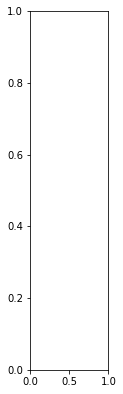

In [26]:
import shap

explainer_rf = shap.Explainer(best_model_c)
shap_values_rf = explainer_rf(X_train_r)
shap_values_rf.base_values = shap_values_rf.base_values.reshape(-1)

shap.summary_plot(shap_values_rf, X_train_r, feature_names=features)

In [34]:
individual = 5

shap.plots._waterfall.waterfall_legacy(
    explainer_rf.expected_value[0]
    , shap_values_rf[individual].values
    , X_train_r.values[individual]
    , features
    , max_display=5
)

Exception: The waterfall_plot can currently only plot a single explanation but a matrix of explanations was passed!